# Detecting Credit Card Fraud

## Overall Objective

This analysis serves to detect fraudulant credit card transactions using supervised machine learning models, and minize future financial losses by establishing user demographic: <br>
1. By conducting regression analysis on mock transaction dataset, we will find which features heavily impact fraudulant behaviors.
2. By conducting classification using decison tree model, and compare two models in terms of appropriate metrics.

## Data Collection

In [2]:
# import basic data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.model_selection import GridSearchCV

In [3]:
# set the display options
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 50)

In [4]:
# import the data set
train_file_path = 'fraudTrain.csv'
test_file_path = 'fraudTest.csv'
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

## Data Validation

check out the basic information on both files


In [5]:
train_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [6]:
test_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,14816,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,95528,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,PA,16858,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,TX,76678,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


Both data files have unlabeled columns, need to drop duplicate columns.

In [7]:
train_data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
train_data.head(10)

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [8]:
test_data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
test_data.head(10)

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,14816,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,95528,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,PA,16858,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,TX,76678,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


check out the basic shape and data types 

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

1. Both files have the same number of columns, and each corresponding column(under the same labeling) has the same data type.<br>
2. Train data has 1296675 data entries, test data has 555719 data entries, both are large datasets.<br>The size of test data is roughly 43% of train data, which is a good proportion in modeling later.

In both files:
1. Column 'trans_date_trans_time' is type object - this needs to be converted to datetime format during EDA and preprocessing.<br>
2. Column 'dob' is type object - this should also be converted to datetime format during EDA and preprocessing.

check for missing values and dupplicate values

In [11]:
train_data.isnull().sum()

id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
test_data.isnull().sum()

id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

no NULL value in both files

In [13]:
train_data.duplicated().sum()

0

In [14]:
test_data.duplicated().sum()

0

no duplicate values in both files

For now, there are only three data types in both data files-object, float, and int.<br> <br>need to check whether numbers in each non-object column contains unique values(no uniformity or constant), so that numbers in these columns make sense.

In [15]:
for col in train_data.select_dtypes(exclude=['object']).columns:
    print(f'Column {col} has {train_data[col].nunique()} unique values')

Column id has 1296675 unique values
Column cc_num has 983 unique values
Column amt has 52928 unique values
Column zip has 970 unique values
Column lat has 968 unique values
Column long has 969 unique values
Column city_pop has 879 unique values
Column unix_time has 1274823 unique values
Column merch_lat has 1247805 unique values
Column merch_long has 1275745 unique values
Column is_fraud has 2 unique values


In [16]:
for col in test_data.select_dtypes(exclude=['object']).columns:
    print(f'Column {col} has {test_data[col].nunique()} unique values')

Column id has 555719 unique values
Column cc_num has 924 unique values
Column amt has 37256 unique values
Column zip has 912 unique values
Column lat has 910 unique values
Column long has 910 unique values
Column city_pop has 835 unique values
Column unix_time has 544760 unique values
Column merch_lat has 546490 unique values
Column merch_long has 551770 unique values
Column is_fraud has 2 unique values


In both files:
1. column 'id' is the primary key of this dataset, as each entry has a unique id.
2. column 'is_fraud' contains only two values, which is great for binary classfication later.
3. All columns have more than 1 unique values, which prevent uniformity.

In [17]:
# convert columns 'trans_date_trans_time' & 'dob' to datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [18]:
test_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
test_data['dob'] = pd.to_datetime(train_data['dob'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

## Exploratory Data Analysis

### Percentage of Fraud

Before, binary classification, it is important to see if the target variable('is_fraud') of both datasets is balanced in terms of containing sufficient positive examples ('is_fraud' to 1) add sufficient negative examples('is_fraud' to 0)

In [19]:
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

0.5% (7506/1289169) of train data is fraudulent transaction - It is **imbalanced**

In [20]:
test_data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

0.4%(2145/553574) of test data is fraudulent transaction - It is also **imbalanced**

In this case, I want to balances uneven datasets with **upsampling technique**, <br> by increasing the size of the data in the minority class to match data in the majority class.

But before proceeding with undersampling, I need to see if our train data can **generalize**, <br>which means it is **representative** in  some key attributes such as transaction dates, ages, and regions.

### Category Distribution

In [21]:
train_data['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x29425bda0>,
 [Text(1.0445098845465166, 0.344962463297998, 'gas_transport'),
  Text(0.6509682912284626, 0.8867019137314951, 'grocery_pos'),
  Text(0.03897810205058762, 1.0993091956135608, 'home'),
  Text(-0.5707446836773632, 0.9403459501981314, 'shopping_pos'),
  Text(-0.981349435608211, 0.4969439457639524, 'kids_pets'),
  Text(-1.0990554288664822, -0.04557591775392924, 'shopping_net'),
  Text(-0.9623990424341992, -0.5327176392064905, 'entertainment'),
  Text(-0.6354413949185906, -0.8978943332173981, 'food_dining'),
  Text(-0.1908634314885612, -1.0833148898267815, 'personal_care'),
  Text(0.2759394582280168, -1.0648274110825795, 'health_fitness'),
  Text(0.6697429860894591, -0.8726077770590718, 'misc_pos'),
  Text(0.9261763929225474, -0.5934621211105048, 'misc_net'),
  Text(1.0487672753419615, -0.3317939152121368, 'grocery_net'),
  Text(1.0947068763388075, -0.10778151463275534, 'travel')],
 [Text(0.5697326642980999, 0.1881613436170898, '10.2%'),
  Text(0

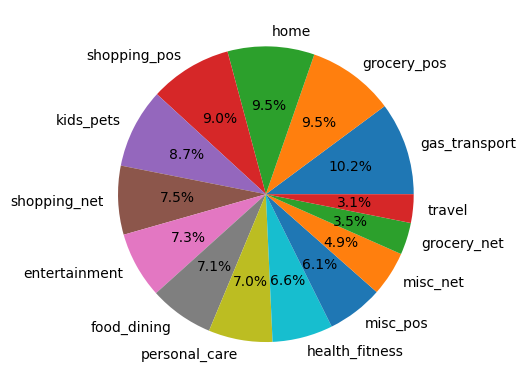

In [22]:
plot.pie(train_data['category'].value_counts(), labels=train_data['category'].value_counts().index, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x116a0ee70>,
 [Text(1.0446178691831312, 0.34463532521100493, 'gas_transport'),
  Text(0.6537002311849656, 0.88468978051559, 'grocery_pos'),
  Text(0.04767182398475028, 1.098966513228664, 'home'),
  Text(-0.5599202314684977, 0.9468312069171909, 'shopping_pos'),
  Text(-0.9756904114117867, 0.5079647833059872, 'kids_pets'),
  Text(-1.0994562772711205, -0.03458170570011265, 'shopping_net'),
  Text(-0.9683079664625056, -0.5219000690603971, 'entertainment'),
  Text(-0.6457570850979872, -0.8905042319078282, 'personal_care'),
  Text(-0.20028519186374438, -1.081612611760839, 'food_dining'),
  Text(0.26811025830805385, -1.0668256133923617, 'health_fitness'),
  Text(0.6648257293369165, -0.8763599429524589, 'misc_pos'),
  Text(0.9251193038290223, -0.5951086234318111, 'misc_net'),
  Text(1.0485341087170637, -0.3325300330149343, 'grocery_net'),
  Text(1.0946526196873645, -0.10833116916008288, 'travel')],
 [Text(0.5697915650089805, 0.18798290466054812, '10.1%'),
  Text

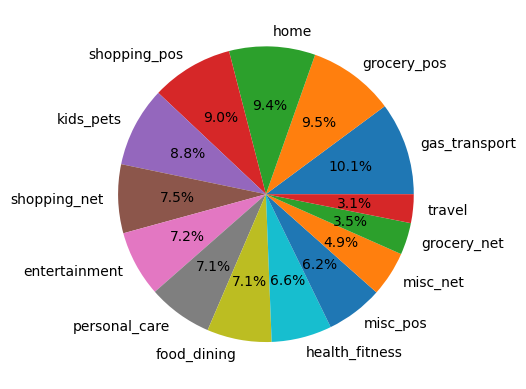

In [23]:
plot.pie(test_data['category'].value_counts(), labels=test_data['category'].value_counts().index, autopct='%1.1f%%')

Both datasets have a diverse range of spending categories, which encompass almost every aspect of life and are well-balanced in the overall transaction percentage.

### Transaction Amount Distribution

In [24]:
# get the basic statistics of the 'amt' column
train_data['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


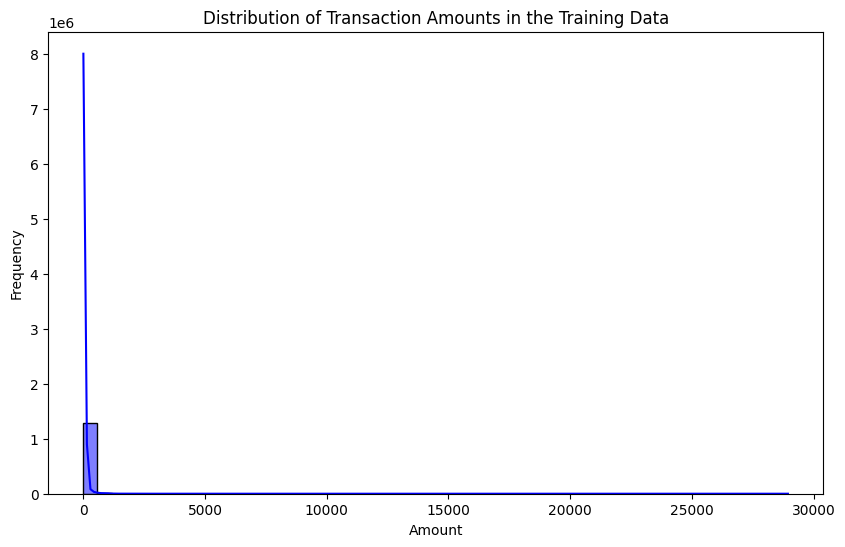

In [25]:
# visualize the distribution of the transaction amount
plot.figure(figsize=(10, 6))
sns.histplot(train_data['amt'], kde=True, color='blue', bins=50)
plot.title('Distribution of Transaction Amounts in the Training Data')
plot.xlabel('Amount')
plot.ylabel('Frequency')
plot.show()

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


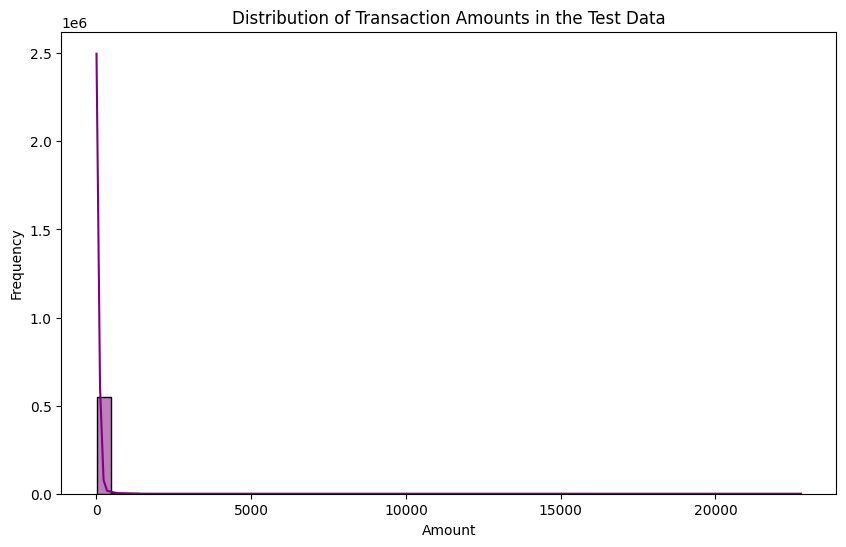

In [26]:
plot.figure(figsize=(10, 6))
sns.histplot(test_data['amt'], kde=True, color='purple', bins=50)
plot.title('Distribution of Transaction Amounts in the Test Data')
plot.xlabel('Amount')
plot.ylabel('Frequency')
plot.show()

The transaction amounts in both train_data and test_data has **a very left skewed distribution** with a large number of small transactions and a few large ones. <br><br>**Large amounts** could potentially be associated with fraudulent activity.

### Gender Distribution

In [27]:
train_data['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

In [28]:
test_data['gender'].value_counts()

gender
F    304886
M    250833
Name: count, dtype: int64

Both datasets have good representation of two genders, with slightly more female cc holders.

### Transaction Date Distribution

Categorize transaction date by:
1. extract month, day of the week, and hour from column 'trans_date_trans_time'. 
2. start a column 'is_weekend' (boolean value) to determine whether transactions occurred on weekends.
3. start a column 'period_of_day' to determine transactions occurred in morning/afternoon/evening.

In [29]:
# 1 extract month, day of the week, and hour from column 'trans_date_trans_time'
train_data['trans_month'] = train_data['trans_date_trans_time'].dt.month
train_data['trans_day'] = train_data['trans_date_trans_time'].dt.day_name()
train_data['trans_hour'] = train_data['trans_date_trans_time'].dt.hour
train_data.head()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_hour
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,Tuesday,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,Tuesday,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,Tuesday,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,Tuesday,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,Tuesday,0


In [30]:
# print value counts in columns transactin month, day and hour to validate
for col in train_data[['trans_month', 'trans_day', 'trans_hour']]:
    print(f'Column {col} has {train_data[col].nunique()} unique values')
    print(train_data[col].value_counts())
    print('\n')

Column trans_month has 12 unique values
trans_month
5     146875
6     143811
3     143789
12    141060
4     134970
1     104727
2      97657
8      87359
7      86596
9      70652
11     70421
10     68758
Name: count, dtype: int64


Column trans_day has 7 unique values
trans_day
Monday       254282
Sunday       250579
Saturday     200957
Tuesday      160227
Friday       152272
Thursday     147285
Wednesday    131073
Name: count, dtype: int64


Column trans_hour has 24 unique values
trans_hour
23    67104
22    66982
18    66051
16    65726
21    65533
19    65508
17    65450
15    65391
13    65314
12    65257
20    65098
14    64885
1     42869
3     42769
2     42656
8     42505
0     42502
6     42300
10    42271
7     42203
9     42185
5     42171
11    42082
4     41863
Name: count, dtype: int64




In [31]:
test_data['trans_month'] = test_data['trans_date_trans_time'].dt.month
test_data['trans_day'] = test_data['trans_date_trans_time'].dt.day_name()
test_data['trans_hour'] = test_data['trans_date_trans_time'].dt.hour

for col in test_data[['trans_month', 'trans_day', 'trans_hour']]:
    print(f'Column {col} has {test_data[col].nunique()} unique values')
    print(test_data[col].value_counts())
    print('\n')

Column trans_month has 8 unique values
trans_month
7    86596
6    86064
5    72532
3    70939
8    69119
4    68078
1    52525
2    49866
Name: count, dtype: int64


Column trans_day has 7 unique values
trans_day
Sunday       107558
Monday       105808
Saturday      90423
Friday        66419
Thursday      65246
Tuesday       62900
Wednesday     57365
Name: count, dtype: int64


Column trans_hour has 24 unique values
trans_hour
22    28497
23    28487
18    28375
19    28100
17    28019
14    27967
16    27963
15    27943
12    27926
21    27876
20    27820
13    27800
1     18530
3     18486
10    18305
6     18291
2     18270
4     18240
8     18178
11    18176
0     18170
7     18128
9     18118
5     18054
Name: count, dtype: int64




Noticed ONLY ***8*** months of transactions in test data

In [32]:
# 2 start a column 'is_weekend' (boolean value) to determine whether transactions occurred on weekends
train_data['is_weekend'] = train_data['trans_day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
train_data['is_weekend'].value_counts()

is_weekend
0    845139
1    451536
Name: count, dtype: int64

In [33]:
test_data['is_weekend'] = test_data['trans_day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
test_data['is_weekend'].value_counts()

is_weekend
0    357738
1    197981
Name: count, dtype: int64

Both train_data and test_data are reprensentative in terms of transactions happening on weekend versus weekdays.

In [34]:
# 3 start a column 'period_of_day' to determine transactions occurred in morning/afternoon/evening/midnight
def period_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'midnght'

train_data['period_of_day'] = train_data['trans_hour'].apply(period_of_day)
train_data['period_of_day'].value_counts()

period_of_day
evening      396276
afternoon    392023
midnght      254830
morning      253546
Name: count, dtype: int64

In [35]:
test_data['period_of_day'] = test_data['trans_hour'].apply(period_of_day)
test_data['period_of_day'].value_counts()

period_of_day
evening      169155
afternoon    167618
midnght      109750
morning      109196
Name: count, dtype: int64

Both train_data and test_data are balanced in recording transactions during different periods of the day.

### Age Distribution

Noticed there is a lack of information regarding the age of each credit card holder(given each credit card has only one holder) <br>
We need to find each holder's age according to their dobs by:
1. set a reference date as 2021-01-01 since datasets are generated as transactions between 2019-01-01 and 2020-12-31
2. calculate age by subtract the date of dobs from the date of ref_date, then divided by 365 (given there are 365 days in one year)

In [36]:
ref_date = pd.to_datetime('2021-01-01')
train_data['age'] = (ref_date - train_data['dob']).dt.days // 365
train_data['age'].value_counts().sort_index()

age
15    1959
16    7496
17    3975
19    5603
20    9530
      ... 
92    4131
93    4645
94    6063
95      11
96     536
Name: count, Length: 81, dtype: int64

In [37]:
test_data['age'] = (ref_date - test_data['dob']).dt.days // 365
test_data['age'].value_counts().sort_index()

age
15     798
16    3061
17    1637
19    2326
20    3858
      ... 
92    1815
93    2022
94    2622
95      11
96     232
Name: count, Length: 81, dtype: int64

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


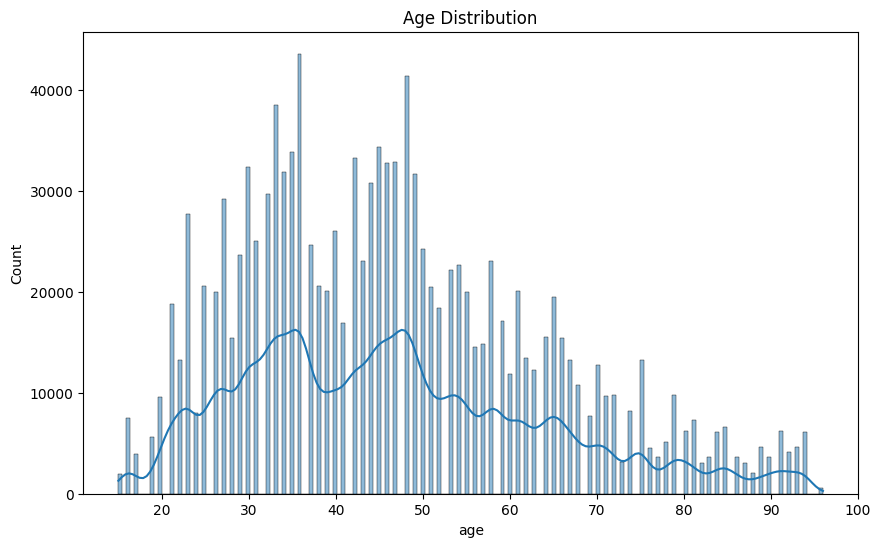

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


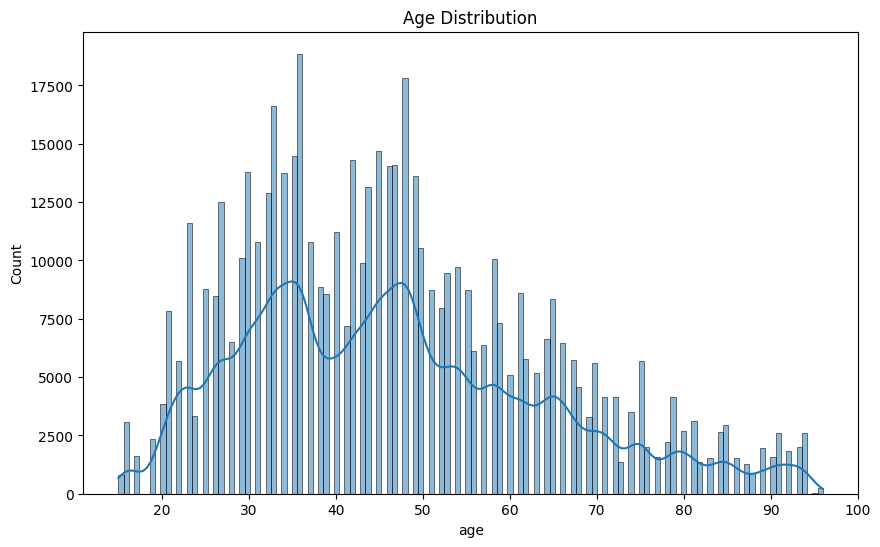

In [38]:
# visualize age distribution in both data
for ages in [train_data['age'], test_data['age']]:
    plot.figure(figsize=(10, 6))
    sns.histplot(ages, kde=True)
    plot.title('Age Distribution')
    plot.show()

In [39]:
# start a column 'age_group' to categorize age into groups
def age_group(age):
    if 0 <= age < 18:
        return 'minor'
    elif 18 <= age < 30:
        return 'young adult'
    elif 30 <= age < 50:
        return 'adult'
    else:
        return 'senior'

train_data['age_group'] = train_data['age'].apply(age_group)
test_data['age_group'] = test_data['age'].apply(age_group)

Both train_data and test_data are:
1. Balanced in terms of age distribution
2. Having minimum age as 15, which is **questionable** data because teenagers usually do not own credit cards <br>Solution: still keep these data for regression analysis
3. Have higher percentage of transactions with age randing from 30 to 50, which can be generalized as millennials tend to use credit cards and incur high spendings. 


### State Distribution

What abot region distribution of cc transactions? Are they representative of people from 50 states?

In [40]:
train_data['state'].nunique()
train_data['state'].value_counts().sort_index()

state
AK     2120
AL    40989
AR    31127
AZ    10770
CA    56360
      ...  
VT    11768
WA    18924
WI    29368
WV    25691
WY    19322
Name: count, Length: 51, dtype: int64

In [41]:
train_data['state'].nunique()
train_data['state'].value_counts().sort_index()

state
AK     2120
AL    40989
AR    31127
AZ    10770
CA    56360
      ...  
VT    11768
WA    18924
WI    29368
WV    25691
WY    19322
Name: count, Length: 51, dtype: int64

In [42]:
# categorize states into Midwest, Northeast, South, West
def regionize(state):
    if state in ['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']:
        return 'Midwest'
    elif state in ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']:
        return 'Northeast'
    elif state in ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']:
        return 'South'
    else:
        return 'West'

In [43]:
train_data['state_region'] = train_data['state'].apply(regionize)
train_data['state_region'].value_counts()

state_region
South        494791
West         385378
Northeast    245130
Midwest      171376
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2a30d6000>,
 [Text(0.39984109870877377, 1.0247570911115282, 'South'),
  Text(-1.0802732872064003, -0.20738762004584183, 'West'),
  Text(0.1605435979527097, -1.0882213713929711, 'Northeast'),
  Text(1.0065343586063, -0.44372129196715865, 'Midwest')],
 [Text(0.21809514475024022, 0.5589584133335608, '38.2%'),
  Text(-0.5892399748398546, -0.11312052002500461, '29.7%'),
  Text(0.08756923524693255, -0.593575293487075, '18.9%'),
  Text(0.5490187410579818, -0.24202979561845012, '13.2%')])

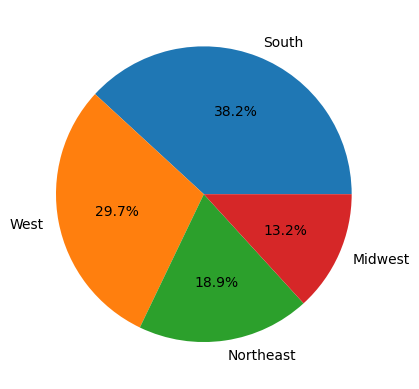

In [44]:
plot.pie(train_data['state_region'].value_counts(), labels=train_data['state_region'].value_counts().index, autopct='%1.1f%%')

In [45]:
test_data['state_region'] = test_data['state'].apply(regionize)
test_data['state_region'].value_counts()

state_region
South        211277
West         165705
Northeast    104851
Midwest       73886
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2a30fda00>,
 [Text(0.40433693930740616, 1.0229915148775766, 'South'),
  Text(-1.0814407042397434, -0.20121133967410507, 'West'),
  Text(0.1564018237776496, -1.0888243520049619, 'Northeast'),
  Text(1.0054300691988292, -0.44621785705060896, 'Midwest')],
 [Text(0.22054742144040335, 0.5579953717514053, '38.0%'),
  Text(-0.5898767477671327, -0.10975163982223911, '29.8%'),
  Text(0.08531008569689977, -0.5939041920027064, '18.9%'),
  Text(0.5484164013811795, -0.24339155839124121, '13.3%')])

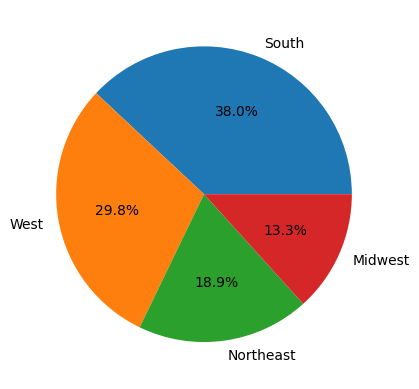

In [46]:
plot.pie(test_data['state_region'].value_counts(), labels=test_data['state_region'].value_counts().index, autopct='%1.1f%%')

Both datasets include **all 50 states** (Washington DC is also listed the 51st state), and have good representation of different regions.

<br>But what about city population? Are they representative?

#### City Population Analysis

In [47]:
train_data['city_pop'].describe()

count    1.296675e+06
mean     8.882444e+04
std      3.019564e+05
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64

Based on the basic stats of city_pop, I will categorize city into 7 different bins

In [48]:
city_pop_bins = [0, 10000, 50000, 100000, 500000, 1000000, np.inf]
city_pop_labels = ['<10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M+']

In [49]:
train_data['city_pop_group'] = pd.cut(train_data['city_pop'], bins=city_pop_bins, labels=city_pop_labels)
train_data['city_pop_group'].value_counts()

city_pop_group
<10k         907611
10k-50k      146390
100k-500k    113165
50k-100k      63800
500k-1M       32895
1M+           32814
Name: count, dtype: int64

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='city_pop_group', ylabel='count'>

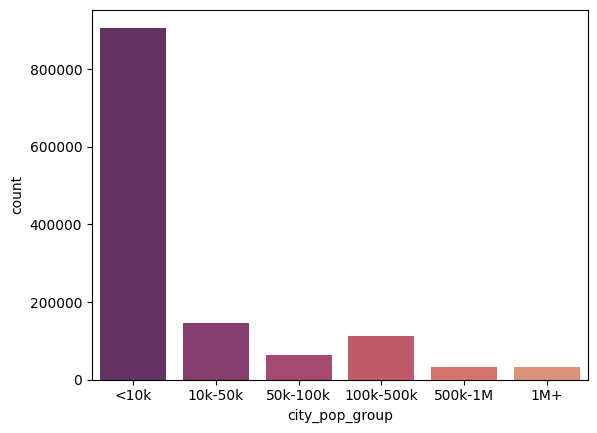

In [50]:
sns.countplot(x='city_pop_group', data=train_data, order=city_pop_labels, palette='flare_r')

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='city_pop_group', ylabel='count'>

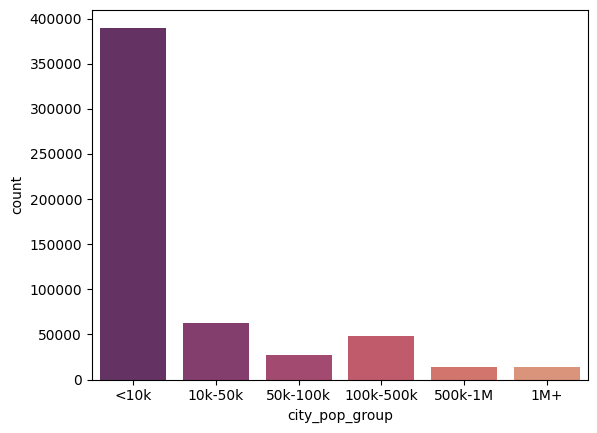

In [51]:
test_data['city_pop_group'] = pd.cut(test_data['city_pop'], bins=city_pop_bins, labels=city_pop_labels)
sns.countplot(x='city_pop_group', data=test_data, order=city_pop_labels, palette='flare_r')

Noticed both train_data and test_data contained more small cities examples than bigger cities, the left-skewness can impact the generalization of the train_data.

### Fraudulent Patterns

Now that we have established our **overall** dataset is balanced in category, geners, transaction dates, age, and regions, <br>we can zoom in and see if **the fraudulent transactions**(positive examples in ML) have any patterns in these atrributes.

In [52]:
# makes a new df with only fraud transactions in the training set
fraud_df = train_data[train_data['is_fraud'] == 1]
fraud_df.info()
# onlt 7506 fraud transactions, less processing time for visualization

<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 2449 to 1295733
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     7506 non-null   int64         
 1   trans_date_trans_time  7506 non-null   datetime64[ns]
 2   cc_num                 7506 non-null   int64         
 3   merchant               7506 non-null   object        
 4   category               7506 non-null   object        
 5   amt                    7506 non-null   float64       
 6   first                  7506 non-null   object        
 7   last                   7506 non-null   object        
 8   gender                 7506 non-null   object        
 9   street                 7506 non-null   object        
 10  city                   7506 non-null   object        
 11  state                  7506 non-null   object        
 12  zip                    7506 non-null   int64         
 13  la

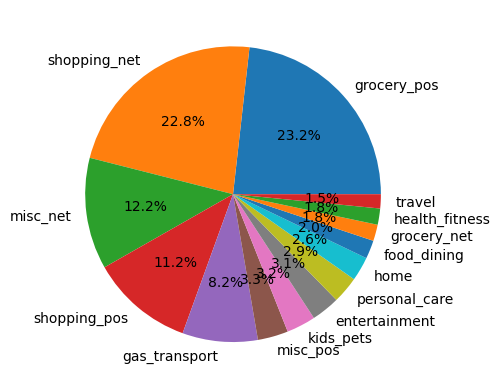

In [53]:
# visualize fraud transactions by category
plot.pie(fraud_df['category'].value_counts(), labels=fraud_df['category'].value_counts().index, autopct='%1.1f%%')
# save to the output folder
plot.savefig('eda_viz/fraud_category.png')

In contrary to the well-balanced category spenings in the overall, fraudulent transactions are more often in **grocery spending**(23.2%) and **online shopping**(22.8%).

In [54]:
fraud_df['amt'].describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

Noticed fraudulent activities occurred in **larger amount**, with an average amounbt of 531.32 dollars and a big spread of standard deviation 390.56.<br><br>But what is the shape of this distribution?

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


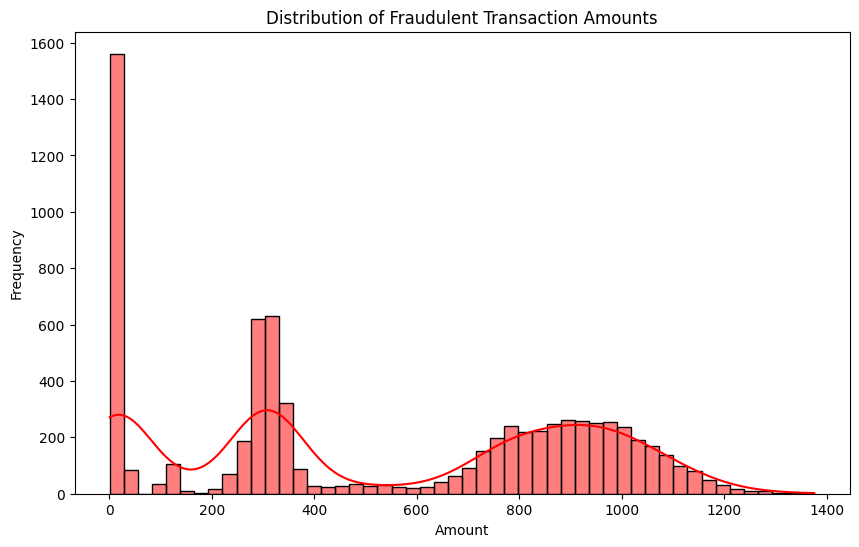

In [55]:
# visualize the distribtution of the transaction amount for fraud transactions
plot.figure(figsize=(10, 6))
fig_amt = sns.histplot(fraud_df['amt'], kde=True, color='red', bins=50)
plot.title('Distribution of Fraudulent Transaction Amounts')
plot.xlabel('Amount')
plot.ylabel('Frequency')
plot.show()
# save to the output folder
fig = fig_amt.get_figure()
fig.savefig('eda_viz/fraud_amt.png')

Compared to the extremely left-skewed transaction distribution in the overall dataset, fraudulent transactions can occur:
1. **most frequently in smaller amount under $100**, 
2. **a smaller surge between $200 and $400**, 
3. as well as **a normal distribution between $600 to $1400**

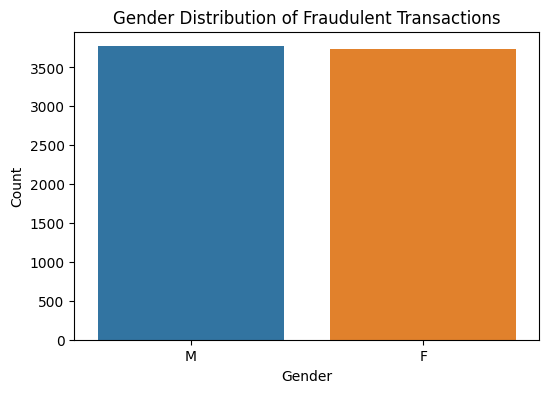

In [56]:
# visualize gender distribution in fraud transactions
plot.figure(figsize=(6, 4))
fig_gender = sns.countplot(x='gender', data=fraud_df, palette='tab10')
plot.title('Gender Distribution of Fraudulent Transactions')
plot.xlabel('Gender')
plot.ylabel('Count')
plot.show()
# save to output folder
fig = fig_gender.get_figure()
fig.savefig('eda_viz/fraud_gender.png')

Female and male are almost equally susceptible to frauds.

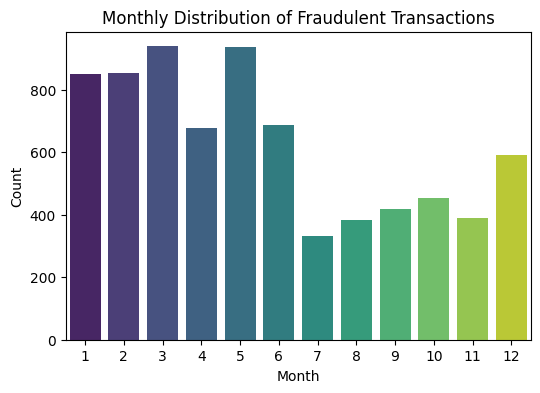

In [57]:
# visualze month distribution of fraud transactions
plot.figure(figsize=(6, 4))
fig_month = sns.countplot(x='trans_month', data=fraud_df, palette='viridis')
plot.title('Monthly Distribution of Fraudulent Transactions')
plot.xlabel('Month')
plot.ylabel('Count')
plot.show()
# save to output folder
fig = fig_month.get_figure()
fig.savefig('eda_viz/fraud_month.png')

More fraudulent transactions in **Quarter 1 (January-March)**, which is the tax season in the United States.

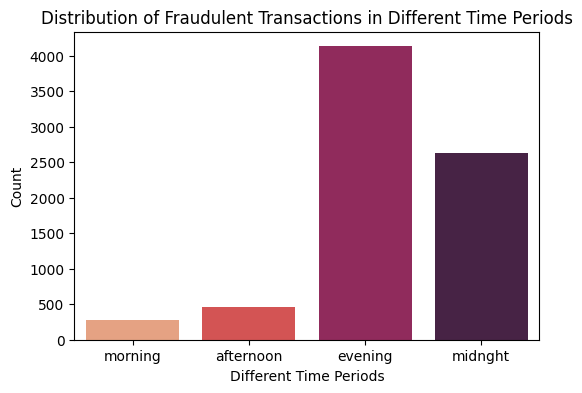

In [58]:
# visualze month distribution of fraud transactions
plot.figure(figsize=(6, 4))
fig_time = sns.countplot(x='period_of_day', data=fraud_df, palette='rocket_r', order=['morning', 'afternoon', 'evening', 'midnght'])
plot.title('Distribution of Fraudulent Transactions in Different Time Periods')
plot.xlabel('Different Time Periods')
plot.ylabel('Count')
plot.show()
# save to output folder
fig = fig_time.get_figure()
fig.savefig('eda_viz/fraud_time.png')

More fraudulent baheviors occurred in the **evenings** and **midnights**.

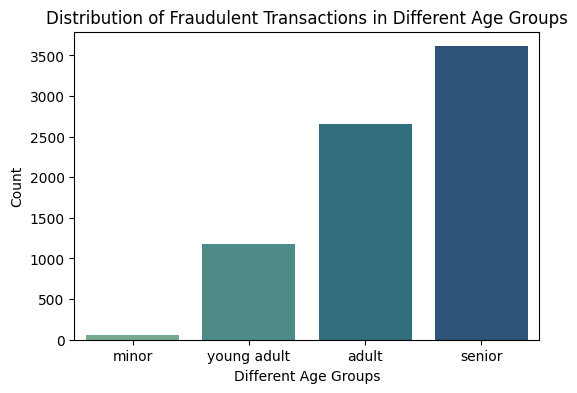

In [59]:
# visualize age distribution of fraud transactions
plot.figure(figsize=(6, 4))
fig_age = sns.countplot(x='age_group', data=fraud_df, palette='crest', order=['minor', 'young adult', 'adult', 'senior'])
plot.title('Distribution of Fraudulent Transactions in Different Age Groups')
plot.xlabel('Different Age Groups')
plot.ylabel('Count')
plot.show()
# save to output folder
fig = fig_age.get_figure()
fig.savefig('eda_viz/fraud_age.png')

Comparing the age distribution of the overall dataset and fraud transactions, **seniors** are significantly more  susceptible to frauds then any other age group,

/var/folders/zn/n1m53dd91kn4vb6h0sjwxhh40000gn/T/ipykernel_6987/1683949038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['state_region'] = fraud_df['state'].apply(regionize)


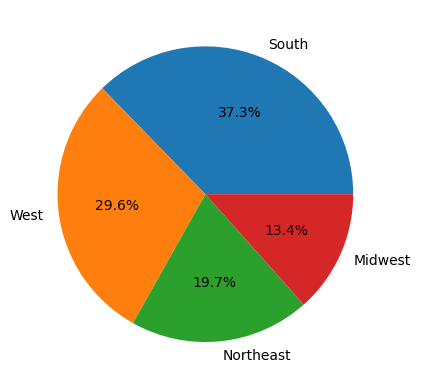

In [60]:
# visualze state distribution of fraud transactions
fraud_df['state_region'] = fraud_df['state'].apply(regionize)
plot.pie(fraud_df['state_region'].value_counts(), labels=fraud_df['state_region'].value_counts().index, autopct='%1.1f%%')
# save to output folder
plot.savefig('eda_viz/state_region_fraud_distribution.png')

By comparing region distribution of the overall dataset and the fraudulent ones, there is **no major percentage change**.

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


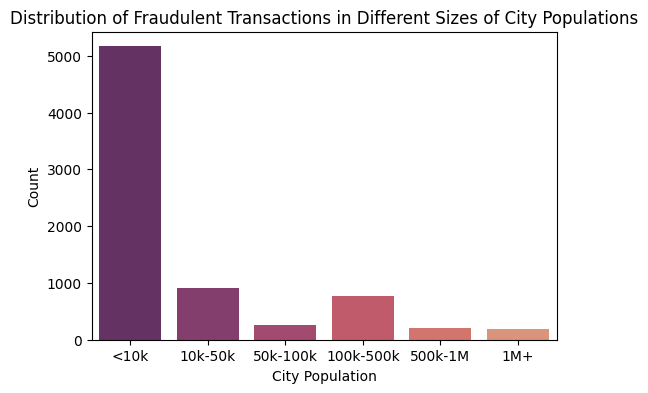

In [61]:
# visualize the city population of fraud transactions
plot.figure(figsize=(6, 4))
fig_city_pop = sns.countplot(x='city_pop_group', data=fraud_df, order=city_pop_labels, palette='flare_r')
plot.title('Distribution of Fraudulent Transactions in Different Sizes of City Populations')
plot.xlabel('City Population')
plot.ylabel('Count')
plot.show()
# save to output folder
fig = fig_city_pop.get_figure()
fig.savefig('eda_viz/fraud_city_pop.png')

No major difference in popluiation size from the overall dataset, but this feature can be futher studied in ML regression

## Data Preprocessing

### Correlation Analysis

After we visualize some key features that can be related to frauds, what about other attrubtes? By what extent are they related to the fraudulent transactions?
<br>
1. Plot all numeric data and see their correlation to fruad
2. Convert relevant non-nemuric columns to dummy variables

In [62]:
train_numeric = train_data.select_dtypes(include=[np.number])
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1296675 non-null  int64  
 1   cc_num       1296675 non-null  int64  
 2   amt          1296675 non-null  float64
 3   zip          1296675 non-null  int64  
 4   lat          1296675 non-null  float64
 5   long         1296675 non-null  float64
 6   city_pop     1296675 non-null  int64  
 7   unix_time    1296675 non-null  int64  
 8   merch_lat    1296675 non-null  float64
 9   merch_long   1296675 non-null  float64
 10  is_fraud     1296675 non-null  int64  
 11  trans_month  1296675 non-null  int32  
 12  trans_hour   1296675 non-null  int32  
 13  is_weekend   1296675 non-null  int64  
 14  age          1296675 non-null  int64  
dtypes: float64(5), int32(2), int64(8)
memory usage: 138.5 MB


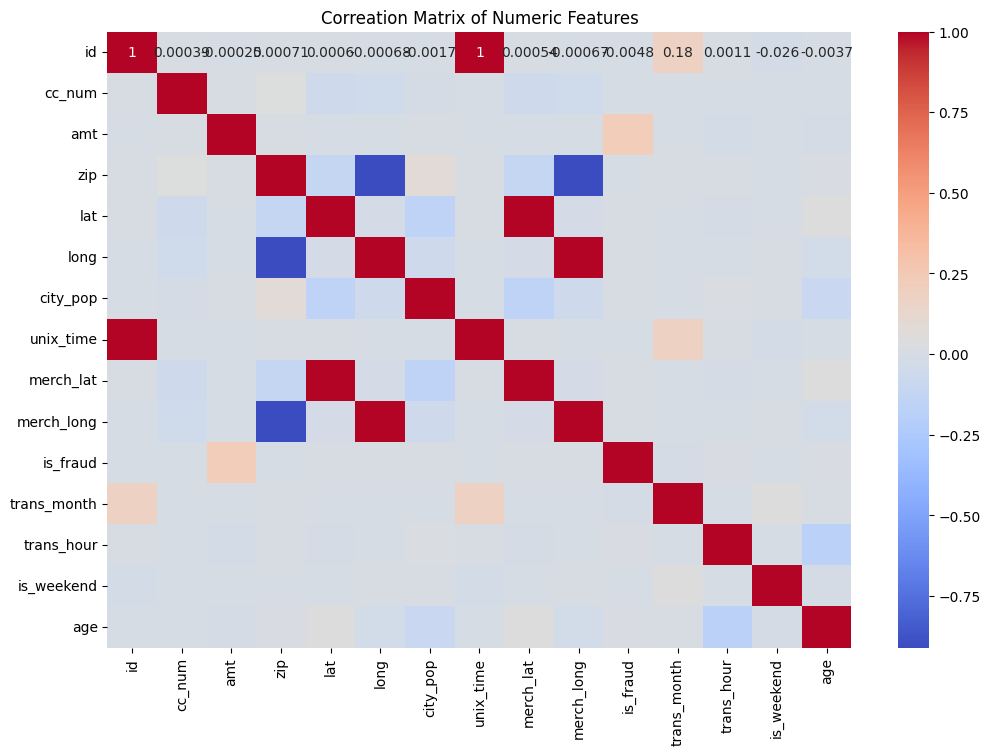

In [63]:
# visualize the correlation matrix
plot.figure(figsize=(12,8))
fig_corr = sns.heatmap(train_numeric.corr(), annot=True, cmap='coolwarm')
plot.title('Correation Matrix of Numeric Features')
plot.show()
# save to output folder
fig = fig_corr.get_figure()
fig.savefig('eda_viz/num_corr.png')

Based on the numeric correlation matrix, we can tell:
1. The numeric values of id and cc_num are NOT useful in ML,  will be removed
2. zip, long, mer_long have higher correlation, which is expected as they both describe geographic features, this will be removed in the future ML analysis
3. city_pop is already binned to city_pop_group, remove
4. **100%** positive correlation between id and unix_time, which leads to suspicision that BOTH drscribe a similar feature, 
    <br>unix_time will be removed because it describes the same thing as trans_time yet less readeable
5. amt has a much **stronger correlation** than any other numeric features.
6. trans_hour can be categorized into period_of_the_day, remove

In [64]:
train_non_num = train_data.select_dtypes(exclude=[np.number])
train_non_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  object        
 3   first                  1296675 non-null  object        
 4   last                   1296675 non-null  object        
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  trans_num              1296675 non-null  object        
 12  trans_day              12966

Based on the categorical correlation matrix, we can tell:
1. trans_date_trans_time is already translated to trans_month, trans_day(need to convert to numbers), and period_of_day(need to convert to numbers), thus is free to be removed
2. dob is translated to age, thus is free to be removed
3. merchant, first, last are names, remove
4. street, city, state are details of geographic features, remove; 
<br>since we have concluded that region distribution does not alter the probability of frauds, state_region is also removed
5. catgory needs to be kept but **more data trimming is required**
6. gender needs to be converted to numeric values
7. city_of_group needs to be converted to numeric values
8. trans_num no signficant meaning, remove

### Data Trimming

In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 32 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [66]:
# drop columns
drop_cols = ['id', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop_group', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'period_of_day', 'age_group', 'state_region', 'trans_day']
train_data_modeling = train_data.drop(drop_cols, axis=1)
train_data_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   category     1296675 non-null  object 
 1   amt          1296675 non-null  float64
 2   gender       1296675 non-null  object 
 3   city_pop     1296675 non-null  int64  
 4   is_fraud     1296675 non-null  int64  
 5   trans_month  1296675 non-null  int32  
 6   trans_hour   1296675 non-null  int32  
 7   is_weekend   1296675 non-null  int64  
 8   age          1296675 non-null  int64  
dtypes: float64(1), int32(2), int64(4), object(2)
memory usage: 79.1+ MB


In [67]:
test_data_modeling = test_data.drop(drop_cols, axis=1)
test_data_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     555719 non-null  object 
 1   amt          555719 non-null  float64
 2   gender       555719 non-null  object 
 3   city_pop     555719 non-null  int64  
 4   is_fraud     555719 non-null  int64  
 5   trans_month  555719 non-null  int32  
 6   trans_hour   555719 non-null  int32  
 7   is_weekend   555719 non-null  int64  
 8   age          555719 non-null  int64  
dtypes: float64(1), int32(2), int64(4), object(2)
memory usage: 33.9+ MB


In [68]:
# convert genders to numerical values
train_data_modeling['gender'] = train_data_modeling['gender'].apply(lambda x: 1 if x == 'M' else 0) # Male is 1, female is 0
train_data_modeling.head()

,category,amt,gender,city_pop,is_fraud,trans_month,trans_hour,is_weekend,age
0,misc_net,4.97,0,3495,0,1,0,0,32
1,grocery_pos,107.23,0,149,0,1,0,0,42
2,entertainment,220.11,1,4154,0,1,0,0,58
3,gas_transport,45.00,1,1939,0,1,0,0,54
4,misc_pos,41.96,1,99,0,1,0,0,34


In [69]:
test_data_modeling['gender'] = test_data_modeling['gender'].apply(lambda x: 1 if x == 'M' else 0) # Male is 1, female is 0
test_data_modeling.head()

,category,amt,gender,city_pop,is_fraud,trans_month,trans_hour,is_weekend,age
0,personal_care,2.86,1,333497,0,1,0,0,32
1,personal_care,29.84,0,302,0,1,0,0,42
2,health_fitness,41.28,0,34496,0,1,0,0,58
3,misc_pos,60.05,1,54767,0,1,0,0,54
4,travel,3.19,1,1126,0,1,0,0,34


In [70]:
# convert all categorical columns to numerical values
train_data_modeling = pd.get_dummies(train_data_modeling, drop_first=True)
train_data_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   trans_month              1296675 non-null  int32  
 5   trans_hour               1296675 non-null  int32  
 6   is_weekend               1296675 non-null  int64  
 7   age                      1296675 non-null  int64  
 8   category_food_dining     1296675 non-null  bool   
 9   category_gas_transport   1296675 non-null  bool   
 10  category_grocery_net     1296675 non-null  bool   
 11  category_grocery_pos     1296675 non-null  bool   
 12  category_health_fitness  1296675 non-null  bool   
 13  category_home            1296675 non-null 

In [71]:
test_data_modeling = pd.get_dummies(test_data_modeling, drop_first=True)
test_data_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   gender                   555719 non-null  int64  
 2   city_pop                 555719 non-null  int64  
 3   is_fraud                 555719 non-null  int64  
 4   trans_month              555719 non-null  int32  
 5   trans_hour               555719 non-null  int32  
 6   is_weekend               555719 non-null  int64  
 7   age                      555719 non-null  int64  
 8   category_food_dining     555719 non-null  bool   
 9   category_gas_transport   555719 non-null  bool   
 10  category_grocery_net     555719 non-null  bool   
 11  category_grocery_pos     555719 non-null  bool   
 12  category_health_fitness  555719 non-null  bool   
 13  category_home            555719 non-null  bool   
 14  cate

In [72]:
train_data_modeling.head()

,amt,gender,city_pop,is_fraud,trans_month,trans_hour,is_weekend,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,1,0,0,32,False,False,False,False,False,False,False,True,False,False,False,False,False
1,107.23,0,149,0,1,0,0,42,False,False,False,True,False,False,False,False,False,False,False,False,False
2,220.11,1,4154,0,1,0,0,58,False,False,False,False,False,False,False,False,False,False,False,False,False
3,45.00,1,1939,0,1,0,0,54,False,True,False,False,False,False,False,False,False,False,False,False,False
4,41.96,1,99,0,1,0,0,34,False,False,False,False,False,False,False,False,True,False,False,False,False


## Model Building

### Upsampling the Minor Class

In [73]:
train_data_majority = train_data_modeling[train_data_modeling['is_fraud'] == 0]
train_data_minority = train_data_modeling[train_data_modeling['is_fraud'] == 1]
train_data_majority.shape, train_data_minority.shape

((1289169, 21), (7506, 21))

In [74]:
# upsample the minority class
train_data_minority_upsampled = resample(train_data_minority, 
                                         replace=True, # sample with replacement
                                         n_samples=1289169, # to match majority class
                                         random_state=42) # reproducible results
train_data_minority_upsampled.shape

(1289169, 21)

In [75]:
# combine the upsampled minority class with the majority class
train_data_upsampled = pd.concat([train_data_majority, train_data_minority_upsampled])
train_data_upsampled.shape

(2578338, 21)

In [76]:
# need to upsample test_data as well
test_data_majority = test_data_modeling[test_data_modeling['is_fraud'] == 0]
test_data_minority = test_data_modeling[test_data_modeling['is_fraud'] == 1]

In [77]:
# upsample the minority class
test_data_minority_upsampled = resample(test_data_minority, 
                                         replace=True, # sample with replacement
                                         n_samples=553574, # to match majority class
                                         random_state=42) # reproducible results
test_data_minority_upsampled.shape

(553574, 21)

In [78]:
test_data_upsampled = pd.concat([test_data_majority, test_data_minority_upsampled])
test_data_upsampled.shape

(1107148, 21)

### Data splitting

In [79]:
# split columns into X & Y, where X are features and y is the target variable 'is_fraud'
X_train = train_data_upsampled.reset_index(drop='index').drop('is_fraud', axis=1)
y_train = train_data_upsampled.reset_index(drop='index')['is_fraud']

In [80]:
# split test data into target variable and features
X_test = test_data_upsampled.drop('is_fraud', axis=1)
y_test = test_data_upsampled['is_fraud']

### Data Normalization

Noticed numeric values are in different scales, need to **normalize** using preprocessing tools

In [81]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

## Logistics Classification

Logistics Regression is the most intuitive approach to binary classfication, as our target variable is a boolean value (0 or 1)

In [82]:
# innstantiate a logistic regression model and fit the train data to this model
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)

LogisticRegression()

### Prediction & Evaluation

In [83]:
test_predictions = logmodel.predict(X_test_scaled)

Because we are trying to predict frauds, we prioritize finding ALL potential frauds over mislabeling normal transactions, <br>
thus we want a better **recall** score and eliminate **type II error** (false negative).

In [84]:
print(classification_report(y_test, test_predictions))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80    553574
           1       0.81      0.77      0.79    553574

    accuracy                           0.80   1107148
   macro avg       0.80      0.80      0.80   1107148
weighted avg       0.80      0.80      0.80   1107148

[[452937 100637]
 [124627 428947]]


In [85]:
# find out the accuracy score of log model before fine tuning
log_model_accuracy = accuracy_score(y_test, test_predictions)
print(f'The accuracy score of the CURRENT logistic regression model is: {log_model_accuracy}')

The accuracy score of the CURRENT logistic regression model is: 0.7965366870553892


Based on the classification report and the confusion matrix, we can see that the logistic model on test data produces a decent **recall** score(***0.77***) and a decent **precision** score(***0.81***).<br><br>
It mislabeled 100637 fraud transactions as normal(**false negative**), which is ***9%*** of the overall test dataset.<br><br>
**The score of model accuracy is 0.79, which indicates the log model performs very well on the test data.**

Try predicting on traning data to examine if there is a issue of **overfitting**

In [86]:
train_predictions = logmodel.predict(X_train_scaled)
print(classification_report(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83   1289169
           1       0.86      0.76      0.81   1289169

    accuracy                           0.82   2578338
   macro avg       0.82      0.82      0.82   2578338
weighted avg       0.82      0.82      0.82   2578338

[[1136426  152743]
 [ 315465  973704]]


In [87]:
log_model_accuracy = accuracy_score(y_train, train_predictions)
print(f'The accuracy score of the CURRENT logistic regression model is: {log_model_accuracy}')

The accuracy score of the CURRENT logistic regression model is: 0.8184070513640958


Based on the classification report and the confusion matrix, we can see that the logistic model on training data produces similar scores in recall and precision, but the model accuracy is slightly better, which signal a potential issue of overfitting.

### Grid Search Optimization

In [89]:
# use grid search to find the best parameters for the logistic classification model
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Add valid solvers for 'l1' and 'l2' penalties
}
grid = GridSearchCV(estimator=logmodel, param_grid=param_grid, refit=True, verbose=2, n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print("Best Parameters:", grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.2min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.2min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.6min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.2min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.2min
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  28.7s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 4.4min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 4.5min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 4.6min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 4.9min
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=  45.0s
[CV] END ................C=0.1, penalty=l1, solv

In [123]:
# use the best parameters to fit the model
best_logmodel = grid.best_estimator_
best_logmodel.fit(X_train_scaled, y_train)
test_predictions = best_logmodel.predict(X_test_scaled)
print(classification_report(y_test, test_predictions))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80    553574
           1       0.81      0.77      0.79    553574

    accuracy                           0.80   1107148
   macro avg       0.80      0.80      0.80   1107148
weighted avg       0.80      0.80      0.80   1107148

[[452874 100700]
 [124888 428686]]


After tuning hyperparameters, logisitcs model still performs with similar scores. 

## L2 Regularization on Logistics Model

In order to avoid overfitting in logistics model, it is necessary to use additional techniques (e.g. cross-validation, regularization, early stopping, pruning, or Bayesian priors).

**Regularization is a way of finding a good bias-variance tradeoff by tuning the complexity of the model. It is a very useful method to handle multicollinearity (high correlation among features), filter out noise from data, and eventually prevent overfitting.**

Why L2 regularization?<br>
L1 regularization penalizes the sum of absolute values of a model's coefficients, leading to sparsity and feature selection, while L2 regularization penalizes the sum of squared coefficients, resulting in smaller weights across all features, but without necessarily forcing any to zero; essentially, L1 encourages feature selection by setting some coefficients to zero, whereas L2 primarily shrinks all weights evenly.<br><br>
In this case, we do not encourage more features as they can introduce noise in training, rather we want to punish the dominant feature 'amt' in affecting the predictions.


In [91]:
# normailize all X features from training data
X_scaled = sc.fit_transform(X_train)

# put the normalized features back into a dataframe and make sure every feature is normalized to the same scale
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)
X_scaled_df.head()

,amt,gender,city_pop,trans_month,trans_hour,is_weekend,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,-0.781820,-0.955847,-0.284878,-1.412133,-1.597484,-0.712849,-0.890192,-0.218235,-0.318571,-0.164834,-0.442343,-0.209624,-0.254429,-0.251835,3.284514,-0.223081,-0.228741,-0.422529,-0.335313,-0.155006
1,-0.510243,-0.955847,-0.295524,-1.412133,-1.597484,-0.712849,-0.340324,-0.218235,-0.318571,-0.164834,2.260690,-0.209624,-0.254429,-0.251835,-0.304459,-0.223081,-0.228741,-0.422529,-0.335313,-0.155006
2,-0.210462,1.046193,-0.282782,-1.412133,-1.597484,-0.712849,0.539464,-0.218235,-0.318571,-0.164834,-0.442343,-0.209624,-0.254429,-0.251835,-0.304459,-0.223081,-0.228741,-0.422529,-0.335313,-0.155006
3,-0.675510,1.046193,-0.289829,-1.412133,-1.597484,-0.712849,0.319517,-0.218235,3.139015,-0.164834,-0.442343,-0.209624,-0.254429,-0.251835,-0.304459,-0.223081,-0.228741,-0.422529,-0.335313,-0.155006
4,-0.683583,1.046193,-0.295683,-1.412133,-1.597484,-0.712849,-0.780218,-0.218235,-0.318571,-0.164834,-0.442343,-0.209624,-0.254429,-0.251835,-0.304459,4.482669,-0.228741,-0.422529,-0.335313,-0.155006


### Implement L2 penalty with gradient ascent 
In regularization, **gradient ascent** is used because it aims to **maximize** the likelihood function to prevent overfitting by pushing the model towards a more "balanced" set of weights, preventing any single feature from becoming overly dominant

In [92]:
# Convert data frame to multi-dimensional array
y_array = y_train.to_numpy()

# step 2: adding L2 penalty to the derivative
# write a function to calculate the conditional probability
def predict_probability(feature_matrix, coefficients):
    score = np.dot(feature_matrix,coefficients.transpose())
    predictions = 1/(1+np.exp(-score))
    return predictions

# write a function to compute the derivative of log likelihood with respect to a single coefficient w_j
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    derivative = np.dot(errors.transpose(),feature)
    if not feature_is_constant: 
        derivative -=2*l2_penalty*coefficient
    return derivative

# write the likelihood function
def compute_log_likelihood_with_L2(feature_matrix, is_fraud, coefficients, l2_penalty):
    indicator = (is_fraud==+1)
    scores = np.dot(feature_matrix, coefficients)
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    return lp

Now write a function to fit a logistic regression model under L2 regularization.
<br><br>
The function should accept the following parameters:<br>
**feature_matrix**: 2D array of features<br>
**is_fraud**: 1D array of class labels<br>
**initial_coefficients**: 1D array containing initial values of coefficients<br>
**step_size**: a parameter controlling the size of the gradient steps<br>
**l2_penalty**: the L2 penalty constant \lambdaλ<br>
**max_iter**: number of iterations to run gradient ascent<br>
The function returns the last set of coefficients after performing **gradient ascent**.

The function carries out the following steps:
<br>
1. **Initialize** vector coefficients to initial_coefficients.<br>
2. **Predict** the class probability  𝑃(𝑦𝑖=+1|𝑥𝑖,𝑤) using your predict_probability function and save it to variable predictions.<br>
3. **Compute** indicator value for  (𝑦𝑖=+1) by comparing fraud against +1. Save it to variable indicator.<br>
4. **Compute** the errors as difference between indicator and predictions. Save the errors to variable errors.<br>
5. *For each j-th coefficient*, **compute** the per-coefficient derivative by calling feature_derivative_L2 with the j-th column of feature_matrix. <br>Don't forget to **supply** the L2 penalty. Then increment the j-th coefficient by (step_size*derivative).<br>
6. Once in a while, **insert** code to print out the log likelihood.<br>
**Repeat** steps 2-6 for max_iter times.

In [93]:
def logistic_regression_with_L2(feature_matrix, is_fraud, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        predictions = predict_probability(feature_matrix, coefficients)
        indicator = (is_fraud==+1)
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j], l2_penalty, is_intercept)
            coefficients[j]=coefficients[j] + step_size*derivative
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, is_fraud, coefficients, l2_penalty)
            print ('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients

In [94]:
# set up the parameters for L2 regularization
feature_matrix = X_scaled
is_fraud = y_array
initial_coefficients = np.zeros(20) # match the shape of the feature matrix
step_size = 5e-6 # almost to zero
max_iter = 10 # number of iterations for gradient ascent
# old max_iter was set to 500, but afte  100 iterations, the log likelihood decrease even further, so a lower number of iterations is set

What if we find different penalities? How much will it impact the value of coefficients?

In [95]:
# L2_penalty = 0
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix, is_fraud, initial_coefficients, step_size, 0, max_iter)
# create a tale to show the coefficients of the model with L2_penalty = 0
coefficients_penalty_0_df = pd.DataFrame(coefficients_0_penalty, index=X_scaled_df.columns, columns=['Coefficients[Penalty=0]'])
coefficients_penalty_0_df.head(50)

# L2_penalty = 4
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix, is_fraud, initial_coefficients, step_size, 4, max_iter)
coefficients_penalty_4_df = pd.DataFrame(coefficients_4_penalty, index=X_scaled_df.columns, columns=['Coefficients[Penalty=4]'])

# L2_penalty = 10
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix, is_fraud, initial_coefficients, step_size, 10, max_iter)
coefficients_penalty_10_df = pd.DataFrame(coefficients_10_penalty, index=X_scaled_df.columns, columns=['Coefficients[Penalty=10]'])

# L2_penalty = 1000
coefficients_1000_penalty = logistic_regression_with_L2(feature_matrix, is_fraud, initial_coefficients, step_size, 1000, max_iter)
coefficients_penalty_1000_df = pd.DataFrame(coefficients_1000_penalty, index=X_scaled_df.columns, columns=['Coefficients[Penalty=1000]'])

iteration 0: log likelihood of observed labels = -2260010.20626076
iteration 1: log likelihood of observed labels = -1341826.61087330
iteration 2: log likelihood of observed labels = -1416455.70629904
iteration 3: log likelihood of observed labels = -1265360.51351359
iteration 4: log likelihood of observed labels = -1767344.70601270
iteration 5: log likelihood of observed labels = -1260425.16452769
iteration 6: log likelihood of observed labels = -1707225.57810448
iteration 7: log likelihood of observed labels = -1215276.88156572
iteration 8: log likelihood of observed labels = -1658365.26360823
iteration 9: log likelihood of observed labels = -1300434.39283292
iteration 0: log likelihood of observed labels = -2260044.36832401
iteration 1: log likelihood of observed labels = -1341835.75893703
iteration 2: log likelihood of observed labels = -1416521.46471804
iteration 3: log likelihood of observed labels = -1265384.61219508
iteration 4: log likelihood of observed labels = -1767448.9419

,Coefficients[Penalty=0],Coefficients[Penalty=4],Coefficients[Penalty=10],Coefficients[Penalty=1000]
amt,3.500774,3.500707,3.500607,3.484806
gender,-0.210455,-0.210441,-0.210420,-0.206745
city_pop,0.000605,0.000604,0.000602,0.000339
trans_month,-0.328493,-0.328492,-0.328491,-0.328289
trans_hour,0.731353,0.731285,0.731182,0.714069
is_weekend,-0.058934,-0.058936,-0.058938,-0.059312
age,0.073926,0.073938,0.073956,0.076938
category_food_dining,0.326781,0.326753,0.326710,0.319923
category_gas_transport,1.447644,1.447520,1.447334,1.417426
category_grocery_net,-0.214496,-0.214597,-0.214747,-0.237877


As the log likelihood shows little varation as the number of iterations increase in exponent rate, we stop at l2_penalty = 1000

In [96]:
# join all coefficients table in one dataframe, index is the feature names, and columns are the coefficients from different L2 penalties
all_coefficients_df = pd.concat([coefficients_penalty_0_df, coefficients_penalty_4_df, coefficients_penalty_10_df, coefficients_penalty_1000_df], axis=1)
all_coefficients_df.head(50)

,Coefficients[Penalty=0],Coefficients[Penalty=4],Coefficients[Penalty=10],Coefficients[Penalty=1000]
amt,3.500774,3.500707,3.500607,3.484806
gender,-0.210455,-0.210441,-0.210420,-0.206745
city_pop,0.000605,0.000604,0.000602,0.000339
trans_month,-0.328493,-0.328492,-0.328491,-0.328289
trans_hour,0.731353,0.731285,0.731182,0.714069
is_weekend,-0.058934,-0.058936,-0.058938,-0.059312
age,0.073926,0.073938,0.073956,0.076938
category_food_dining,0.326781,0.326753,0.326710,0.319923
category_gas_transport,1.447644,1.447520,1.447334,1.417426
category_grocery_net,-0.214496,-0.214597,-0.214747,-0.237877


Coefficients of different features remain consistent, where 'amt' is the dominant feature.

In [97]:
# Using the coefficients trained with different L2 penalties, predict the test data with new log model
for l2 in [0, 4, 10, 1000]:
    print(f'Logistic Regression Model with L2 Penalty: {l2}')
    coefficients = logistic_regression_with_L2(feature_matrix, is_fraud, initial_coefficients, step_size, l2, max_iter)
    predictions = predict_probability(X_test_scaled, coefficients)
    test_predictions = (predictions >= 0.5).astype(int)
    print(classification_report(y_test, test_predictions))
    print(confusion_matrix(y_test, test_predictions))


Logistic Regression Model with L2 Penalty: 0
iteration 0: log likelihood of observed labels = -2260010.20626076
iteration 1: log likelihood of observed labels = -1341826.61087330
iteration 2: log likelihood of observed labels = -1416455.70629904
iteration 3: log likelihood of observed labels = -1265360.51351359
iteration 4: log likelihood of observed labels = -1767344.70601270
iteration 5: log likelihood of observed labels = -1260425.16452769
iteration 6: log likelihood of observed labels = -1707225.57810448
iteration 7: log likelihood of observed labels = -1215276.88156572
iteration 8: log likelihood of observed labels = -1658365.26360823
iteration 9: log likelihood of observed labels = -1300434.39283292
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    553574
           1       0.77      0.81      0.79    553574

    accuracy                           0.78   1107148
   macro avg       0.79      0.78      0.78   1107148
weighted avg 

### Reflection on the L2 Regularization
Based on the gradient ascent, one explanation on why our log model did not generalize well is because our model is too complex, as many features included in our training has very small coefficients. <br><br>
Another explanation is that we have over simplified the model complexity by cutting too many variables before ML training, <br>but this is detable as we have analyzed each variable based on correlation matrix and determined their relevance with empirical knowledge.

## Decision Tree

Additon to create a logisitc claffication model to predict future frauds, decision tree is also a great model in finding which feature has the strongest predictive power.

In [99]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [124]:
test_predictions = dtree.predict(X_test_scaled)
print(classification_report(y_test, test_predictions))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.65      0.99      0.79    553574
           1       0.98      0.48      0.64    553574

    accuracy                           0.73   1107148
   macro avg       0.82      0.73      0.72   1107148
weighted avg       0.82      0.73      0.72   1107148

[[548608   4966]
 [289697 263877]]


In [101]:
dt_model_accuracy = accuracy_score(y_test, test_predictions)
print(f'The accuracy score of the CURRENT decision tree model on test data is: {dt_model_accuracy}')

The accuracy score of the CURRENT decision tree model on test data is: 0.7338540104845964


In [102]:
train_predictions = dtree.predict(X_train_scaled)
print(classification_report(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338

[[1289169       0]
 [      0 1289169]]


In [103]:
dt_model_accuracy = accuracy_score(y_train, train_predictions)
print(f'The accuracy score of the CURRENT decision tree model on training data is: {dt_model_accuracy}')

The accuracy score of the CURRENT decision tree model on training data is: 1.0


Decision Tree model yields perfect score on **training data**, but perform much more poorly on **test data**, with only ***0.48*** in **recall score**. <br>This means that decision tree model can only retrieve 50% of all frauds.<br>
However, it has much fewer cases of type II errors (4966) , which is only ***0.4%*** of the overall test data.<br><br>
Most importantly,<br>**There is a major issue in overfitting.**

Even though this decision tree model yields **a worse performance** than the best estimators of logistics modeling, it create a hiearchy clustering that helps us identify which features are dominant.

In [104]:
# find out the hiearchy of features in the decision tree model
feature_importance = dtree.feature_importances_
feature_importance

array([0.70019559, 0.0031185 , 0.01676335, 0.00452061, 0.07758299,
       0.00095049, 0.02106773, 0.00960006, 0.07750258, 0.02440995,
       0.00251994, 0.00275281, 0.00862423, 0.00643842, 0.0011199 ,
       0.01823025, 0.00698814, 0.00296084, 0.00221294, 0.01244068])

In [105]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,amt,gender,city_pop,trans_month,trans_hour,is_weekend,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,-0.781820,-0.955847,-0.284878,-1.412133,-1.597484,-0.712849,-0.890192,-0.218235,-0.318571,-0.164834,-0.442343,-0.209624,-0.254429,-0.251835,3.284514,-0.223081,-0.228741,-0.422529,-0.335313,-0.155006
1,-0.510243,-0.955847,-0.295524,-1.412133,-1.597484,-0.712849,-0.340324,-0.218235,-0.318571,-0.164834,2.260690,-0.209624,-0.254429,-0.251835,-0.304459,-0.223081,-0.228741,-0.422529,-0.335313,-0.155006
2,-0.210462,1.046193,-0.282782,-1.412133,-1.597484,-0.712849,0.539464,-0.218235,-0.318571,-0.164834,-0.442343,-0.209624,-0.254429,-0.251835,-0.304459,-0.223081,-0.228741,-0.422529,-0.335313,-0.155006
3,-0.675510,1.046193,-0.289829,-1.412133,-1.597484,-0.712849,0.319517,-0.218235,3.139015,-0.164834,-0.442343,-0.209624,-0.254429,-0.251835,-0.304459,-0.223081,-0.228741,-0.422529,-0.335313,-0.155006
4,-0.683583,1.046193,-0.295683,-1.412133,-1.597484,-0.712849,-0.780218,-0.218235,-0.318571,-0.164834,-0.442343,-0.209624,-0.254429,-0.251835,-0.304459,4.482669,-0.228741,-0.422529,-0.335313,-0.155006


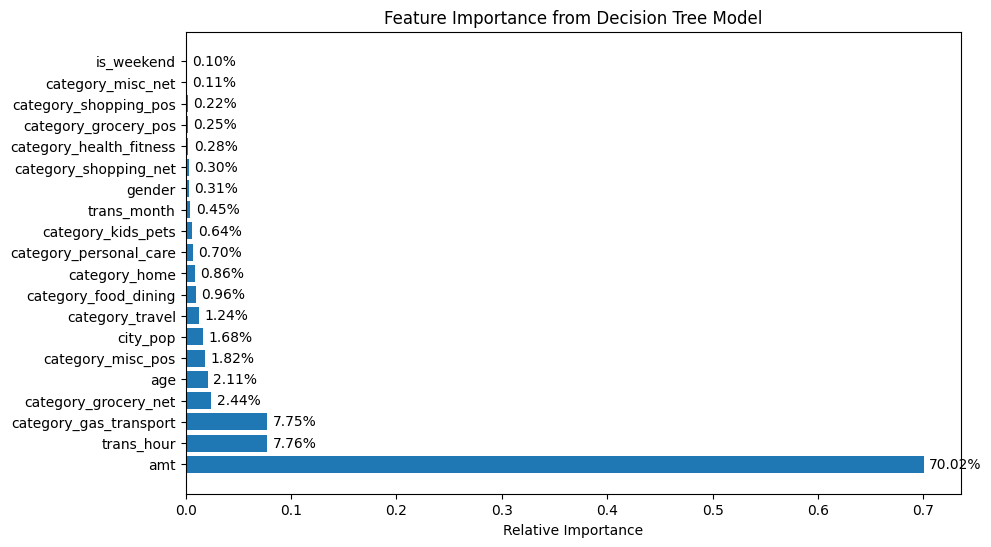

<Figure size 640x480 with 0 Axes>

In [122]:
sorted_indices = np.argsort(feature_importance)[::-1]

# create a tree plot to visualize the hearchy of features
plot.figure(figsize=(10, 6))
plot.title('Feature Importance from Decision Tree Model')
plot.barh(range(len(X_train_scaled_df.columns)), feature_importance[sorted_indices], align='center')
plot.yticks(range(len(X_train_scaled_df.columns)), X_train_scaled_df.columns[sorted_indices])
plot.xlabel('Relative Importance')
for bar in plot.gca().patches:
    width = bar.get_width()
    plot.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f'{width:.2%}', va='center')

plot.show()

plot.savefig('eda_viz/feature_importance.png')

Based on the hiearchy of features yielded by the decision tree model, transaction amount is much more significant than other features in fraud detection.

In Decision Tree, there is a high chance of **overfitting** because the tree can grow to become too complex, resulting in poor performance on unseen data.<br> 
There are two methods to prevent overfitting:
1. **Random Forest** uses ensemble method and combines the predictions of multiple trees, which reduces the variance of the model.
2. **XGBoost** uses gradient boosting where each tree learns from the residual from its previous tree.

### Random Forest

In [107]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [108]:
# predict the test data
test_predictions = rfc.predict(X_test_scaled)
print(classification_report(y_test, test_predictions))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79    553574
           1       0.99      0.47      0.64    553574

    accuracy                           0.73   1107148
   macro avg       0.82      0.73      0.71   1107148
weighted avg       0.82      0.73      0.71   1107148

[[551750   1824]
 [294196 259378]]


In [109]:
rf_model_accuracy = accuracy_score(y_test, test_predictions)
print(f'The accuracy score of the random forest model on test data is: {rf_model_accuracy}')

The accuracy score of the random forest model on test data is: 0.7326283387586845


In [110]:
# predict the train data
train_predictions = rfc.predict(X_train_scaled)
print(classification_report(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338

[[1289169       0]
 [      0 1289169]]


In [111]:
rf_model_accuracy = accuracy_score(y_train, train_predictions)
print(f'The accuracy score of the random forest model on training data is: {rf_model_accuracy}')

The accuracy score of the random forest model on training data is: 1.0


By implementing decision tree model, there is **no improvement** in recall score, and tyoe II errors even increases to ***27%*** (293683/1107148).

### XGBoost

In [112]:
# use XGBoost to predict the test data
xgb = xg.XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [114]:
# predict the test data
test_predictions = xgb.predict(X_test_scaled)
print(classification_report(y_test, test_predictions))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84    553574
           1       0.97      0.64      0.77    553574

    accuracy                           0.81   1107148
   macro avg       0.85      0.81      0.80   1107148
weighted avg       0.85      0.81      0.80   1107148

[[543149  10425]
 [199487 354087]]


In [115]:
xgb_model_accuracy = accuracy_score(y_test, test_predictions)
print(f'The accuracy score of the XGBoost model on test data is: {xgb_model_accuracy}')

The accuracy score of the XGBoost model on test data is: 0.8104029452250286


In [117]:
train_predictions = xgb.predict(X_train_scaled)
print(classification_report(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289169
           1       0.99      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338

[[1279111   10058]
 [      0 1289169]]


In [118]:
xgb_model_accuracy = accuracy_score(y_train, train_predictions)
print(f'The accuracy score of the random forest model on training data is: {xgb_model_accuracy}')

The accuracy score of the random forest model on training data is: 0.996099037441949


XGBoost outperforms random forest and improved the **recall score** to ***0.64*** and **precision score** to ***0.97*** on test data, while reduce **type II errors** to ***0.9%***. Even though model still suffers from the issue of overfitting, but its accuracy score is the same as the optimized logistics model.

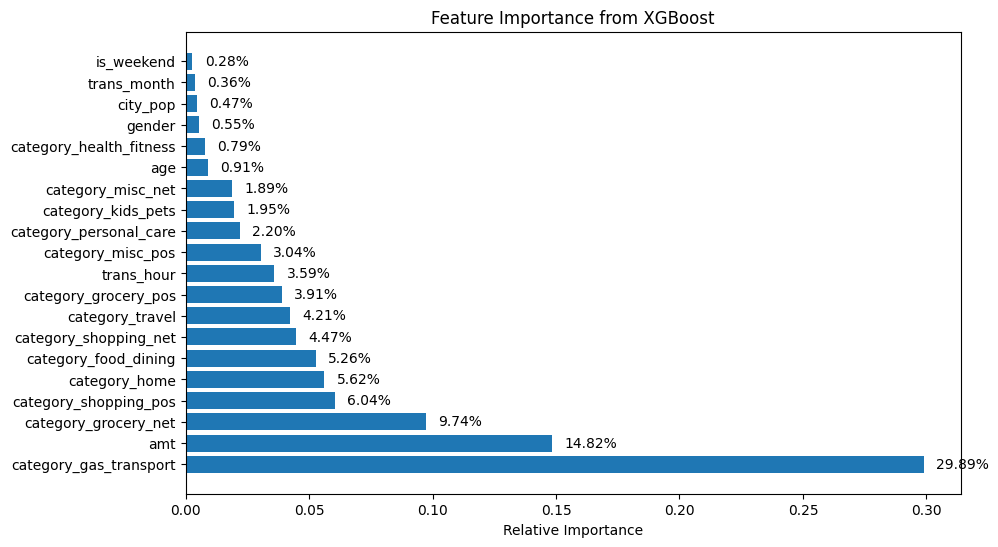

<Figure size 640x480 with 0 Axes>

In [121]:
feature_importance_1 = xgb.feature_importances_
sorted_indices = np.argsort(feature_importance_1)[::-1]

# create a tree plot to visualize the hearchy of features
plot.figure(figsize=(10, 6))
plot.title('Feature Importance from XGBoost')
plot.barh(range(len(X_train_scaled_df.columns)), feature_importance_1[sorted_indices], align='center')
plot.yticks(range(len(X_train_scaled_df.columns)), X_train_scaled_df.columns[sorted_indices])
plot.xlabel('Relative Importance')
for bar in plot.gca().patches:
    width = bar.get_width()
    plot.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f'{width:.2%}', va='center')

plot.show()


plot.savefig('eda_viz/feature_importance_1.png')

Howevever, xgboost model shows a very different feature importance in predicting frauds. Based on the graph, the dominant feature becomes whether this transactions takes place at transport stations or gas stations. This is an interesting yet rasonable finding, but its general relevation is questionable.

## Conclusion

The objective of this project is to **detect patterns of fraudulent transations and prevent future incidents**, the potential audience is **account manager** in banks in the United States. The technique is predictive modeling, and the performance of our binary classifier is evaluated primarily **greater recall score & precision score**, as well as **fewer incidents of type II errors** in real-time data.
<br><br>
This training dataset contains millions of data entries providing valuable information regarding transactions in the United States in recent years, and by correlation analysis and empirical knowledge, we are able to visualize fraud patterns and reduce the essential features to of fraud transactions to: **transaction amount, spending categories, city population, gender of card holder, age of the card holder, and time which this transaction occurs(month, weekend, hours)** . 
<br><br>
I trained the binary classifier using logistics regression and decision tree modeling to predict future frauds. Due to the extreme imbalance of training data, I upsampled the training data and preprocessed essential features.
After using grid search to optimize the logistics model, and applying random forest to reduce overfitting, here are the final results:
1. a ***81%*** accuracy logistics model with ***0.77*** **recall score**, ***0.81*** **precision score** and ***9%*** **type II errors**
2. a ***81%*** accuracy XGBoost model with ***0.64*** **recall score** and ***0.97*** **pecision score** and only ***0.9%*** **type II errors**
3. Both logistics model and decision tree model shows **transaction amount** as the dominant impact on the possibility of fraud, with a sinificant coefficent importance of over ***70%***. However, XGBoost model shows that whether transaction takes place at a transport/gas station is the most important feature with importance of ***29%***. 
<br>
All decision tree models do not generalize well to real-time data, and the resulting issue is less recall score and larger volume of type II errors, which can be detrimental to normnal transactions. (**overfitting**)<br><br>
I optimized the logistics model by implementing Grid Search to fine-tuning the parameters and L2 regularization using gradient ascent.
I optimized the decision tree model by using random forest to emsemble multiple decision tree models and implements xgboosting for gradient learning.

<br><br>
***Overall, I would choose logistics models over tree models to detect fraud transactions, because it shows a consistent results over optimization.***
<br><br>
The optimal logistics model can help account manager pay attention to large volume transactions and prevent future frauds.


## Resources

Use Grid Search to fine tune the logistics regression for better performance.
<br> More info on: https://www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/#hyperparameters-in-gridsearchcv

Logistic Regression and regularization: Avoiding overfitting and improving generalization
https://medium.com/@rithpansanga/logistic-regression-and-regularization-avoiding-overfitting-and-improving-generalization-e9afdcddd09d

Overfitting and Regularization in Logistic Regression: https://tung-dn.github.io/prog_class3.html#Overfitting-and-Regularization-in-Logistic-Regression